In [50]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
from statsmodels.tsa.arima_model import ARMA

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose

In [52]:
arma_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\data\daily\crypto\chainlink\COINBASE_LINKUSD, 1D.csv',index_col='time', parse_dates=True)

In [53]:
arma_df.head(10)

,open,high,low,close,Commercials long,Commercials short,Commercials net,Large Speculators long,Large Speculators short,Large Speculators net,...,OI,Commercials long.1,Commercials short.1,Commercials net.1,Large Speculators long.1,Large Speculators short.1,Large Speculators net.1,Small Speculators long.1,Small Speculators short.1,Small Speculators net.1
time,,,,,,,,,,,,,,,,,,,,,
2017-09-20 00:00:00+00:00,0.156494,0.186840,0.153551,0.186840,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-21 00:00:00+00:00,0.186840,0.207521,0.156614,0.169521,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-22 00:00:00+00:00,0.169521,0.181547,0.140759,0.158151,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-23 00:00:00+00:00,0.158151,0.158151,0.126496,0.129924,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-24 00:00:00+00:00,0.129924,0.183721,0.129924,0.171196,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-25 00:00:00+00:00,0.171196,0.182637,0.159360,0.182637,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-26 00:00:00+00:00,0.182637,0.223162,0.182162,0.195895,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-27 00:00:00+00:00,0.195895,0.206086,0.194905,0.195651,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-28 00:00:00+00:00,0.195651,0.282485,0.192768,0.245551,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
print(len(arma_df))

1932


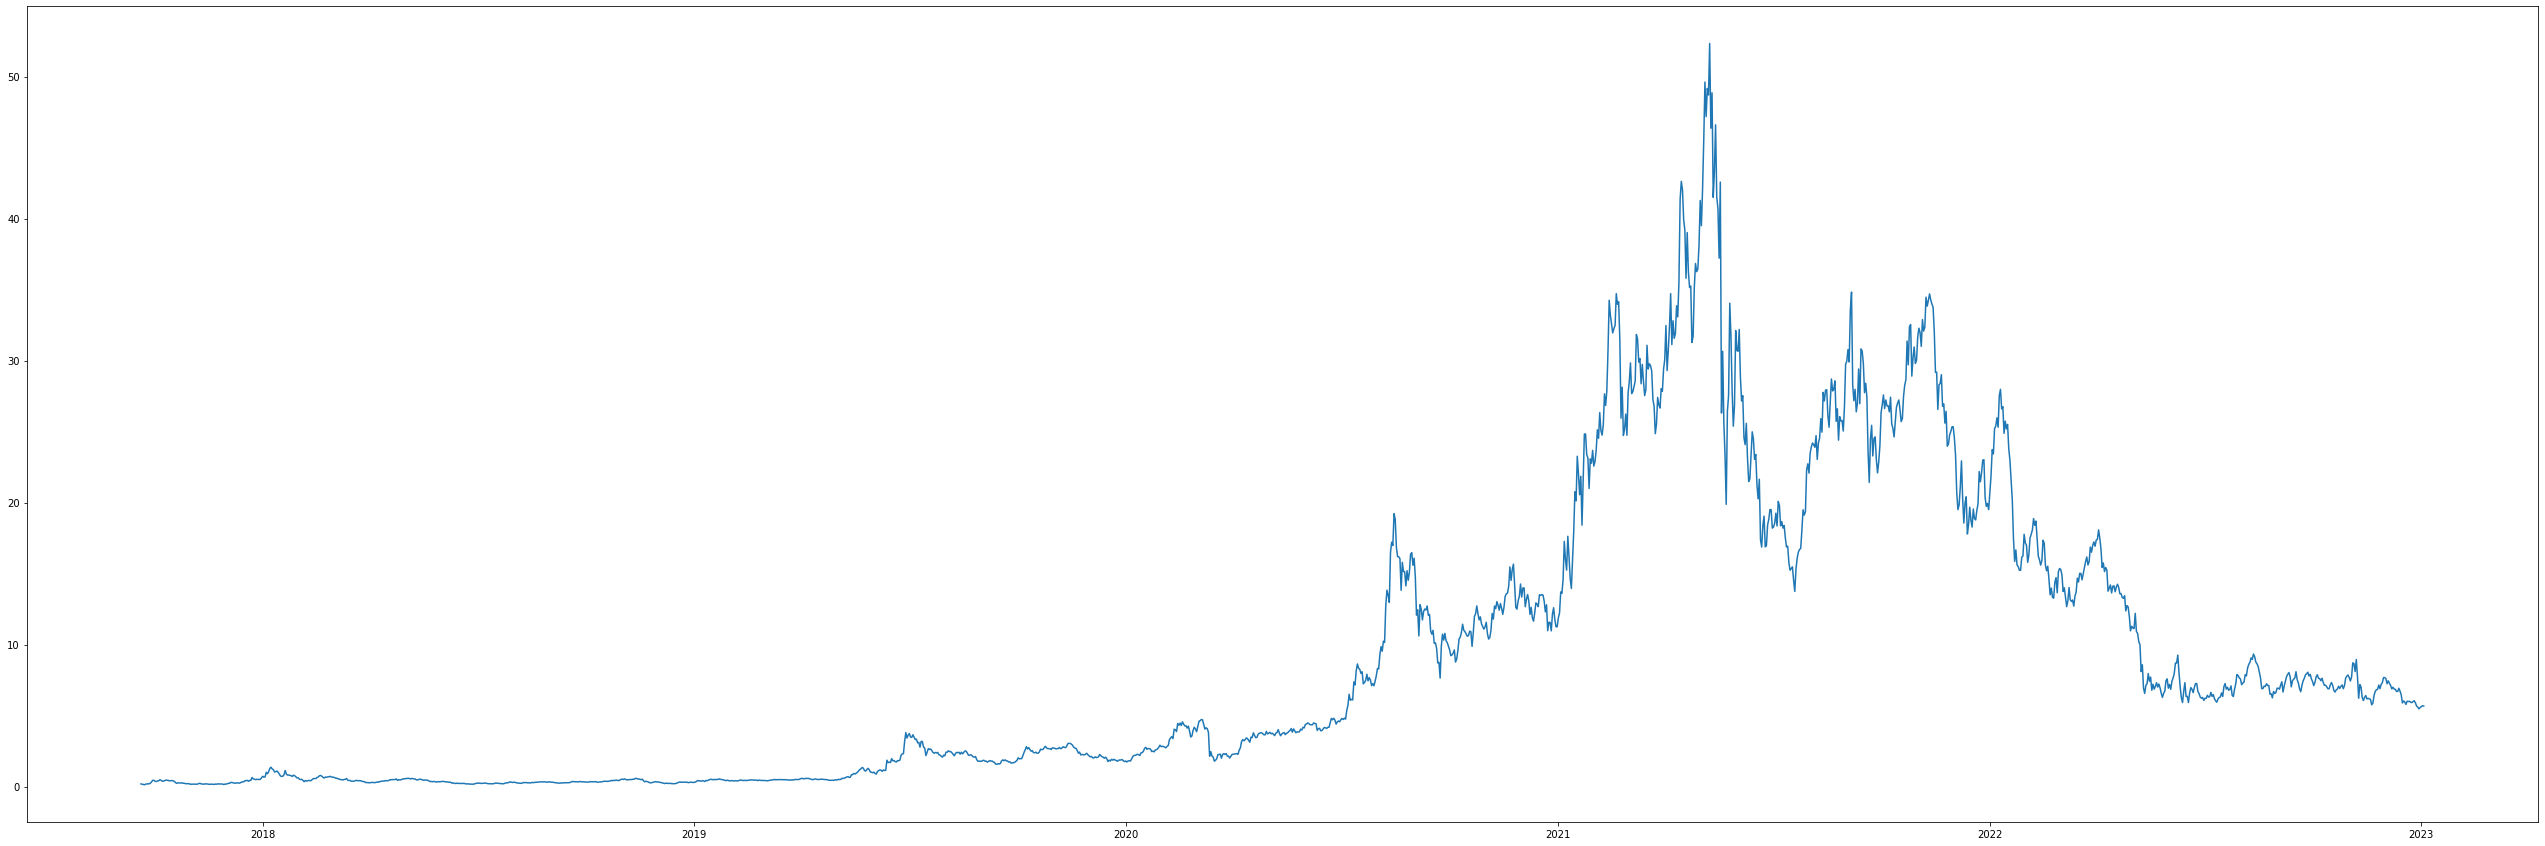

In [55]:
plt.figure(figsize=(45,15))
plt.plot(arma_df['close'])
plt.show()

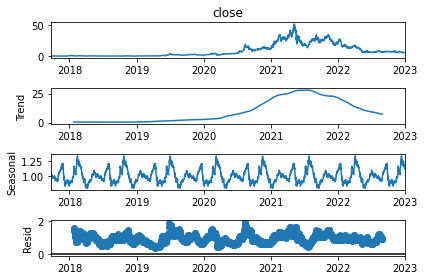

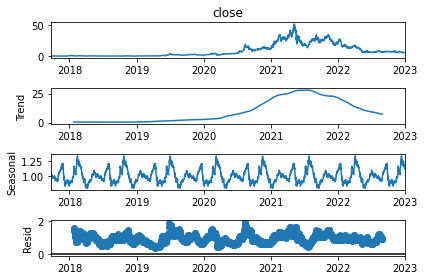

In [56]:

seasonal_result = seasonal_decompose(arma_df['close'], model="multiplicative",period=252)

trend = seasonal_result.trend
seasonal = seasonal_result.seasonal
corn_residual = seasonal_result.resid

seasonal_result.plot()

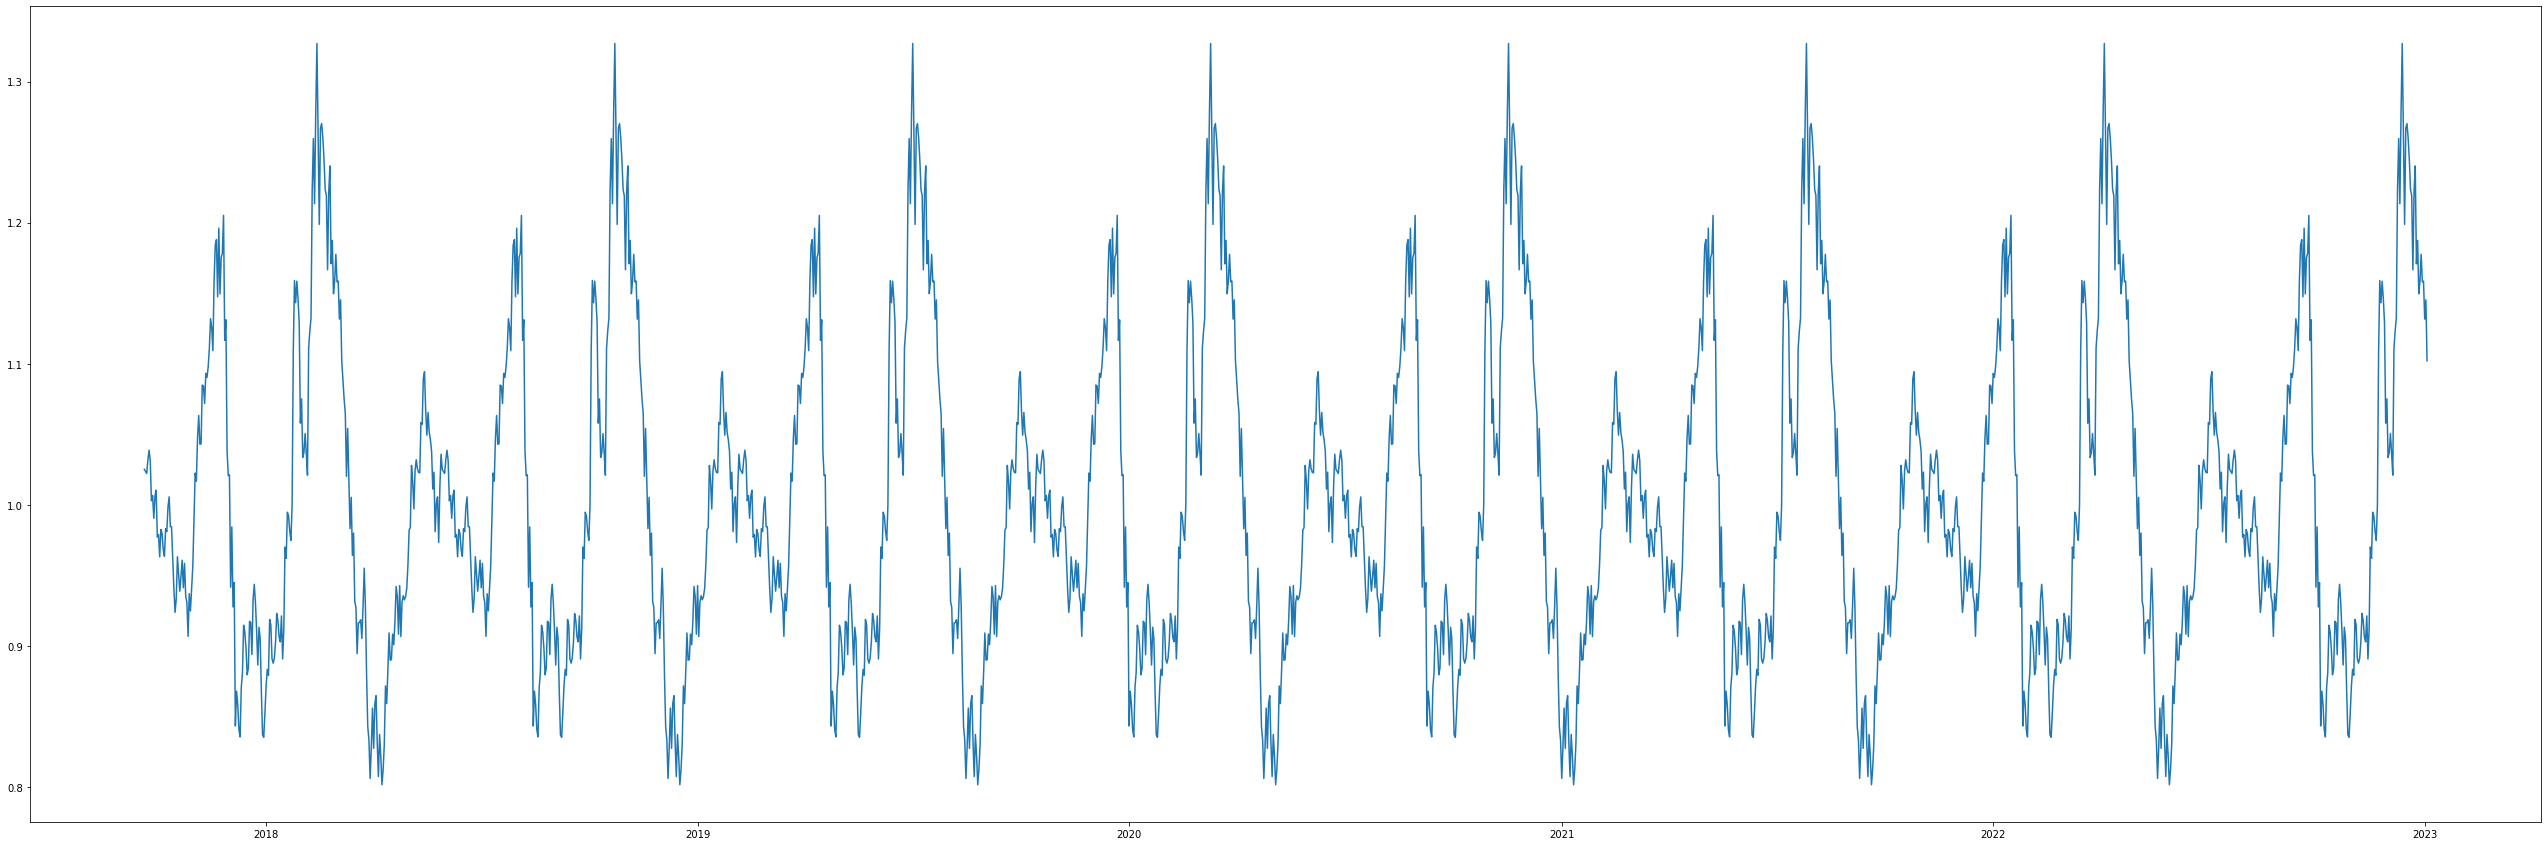

In [57]:
plt.figure(figsize=(45,15))

plt.plot(seasonal)

plt.show()

In [58]:
log_diff = np.log(arma_df['close']).diff(1).dropna(axis=0)

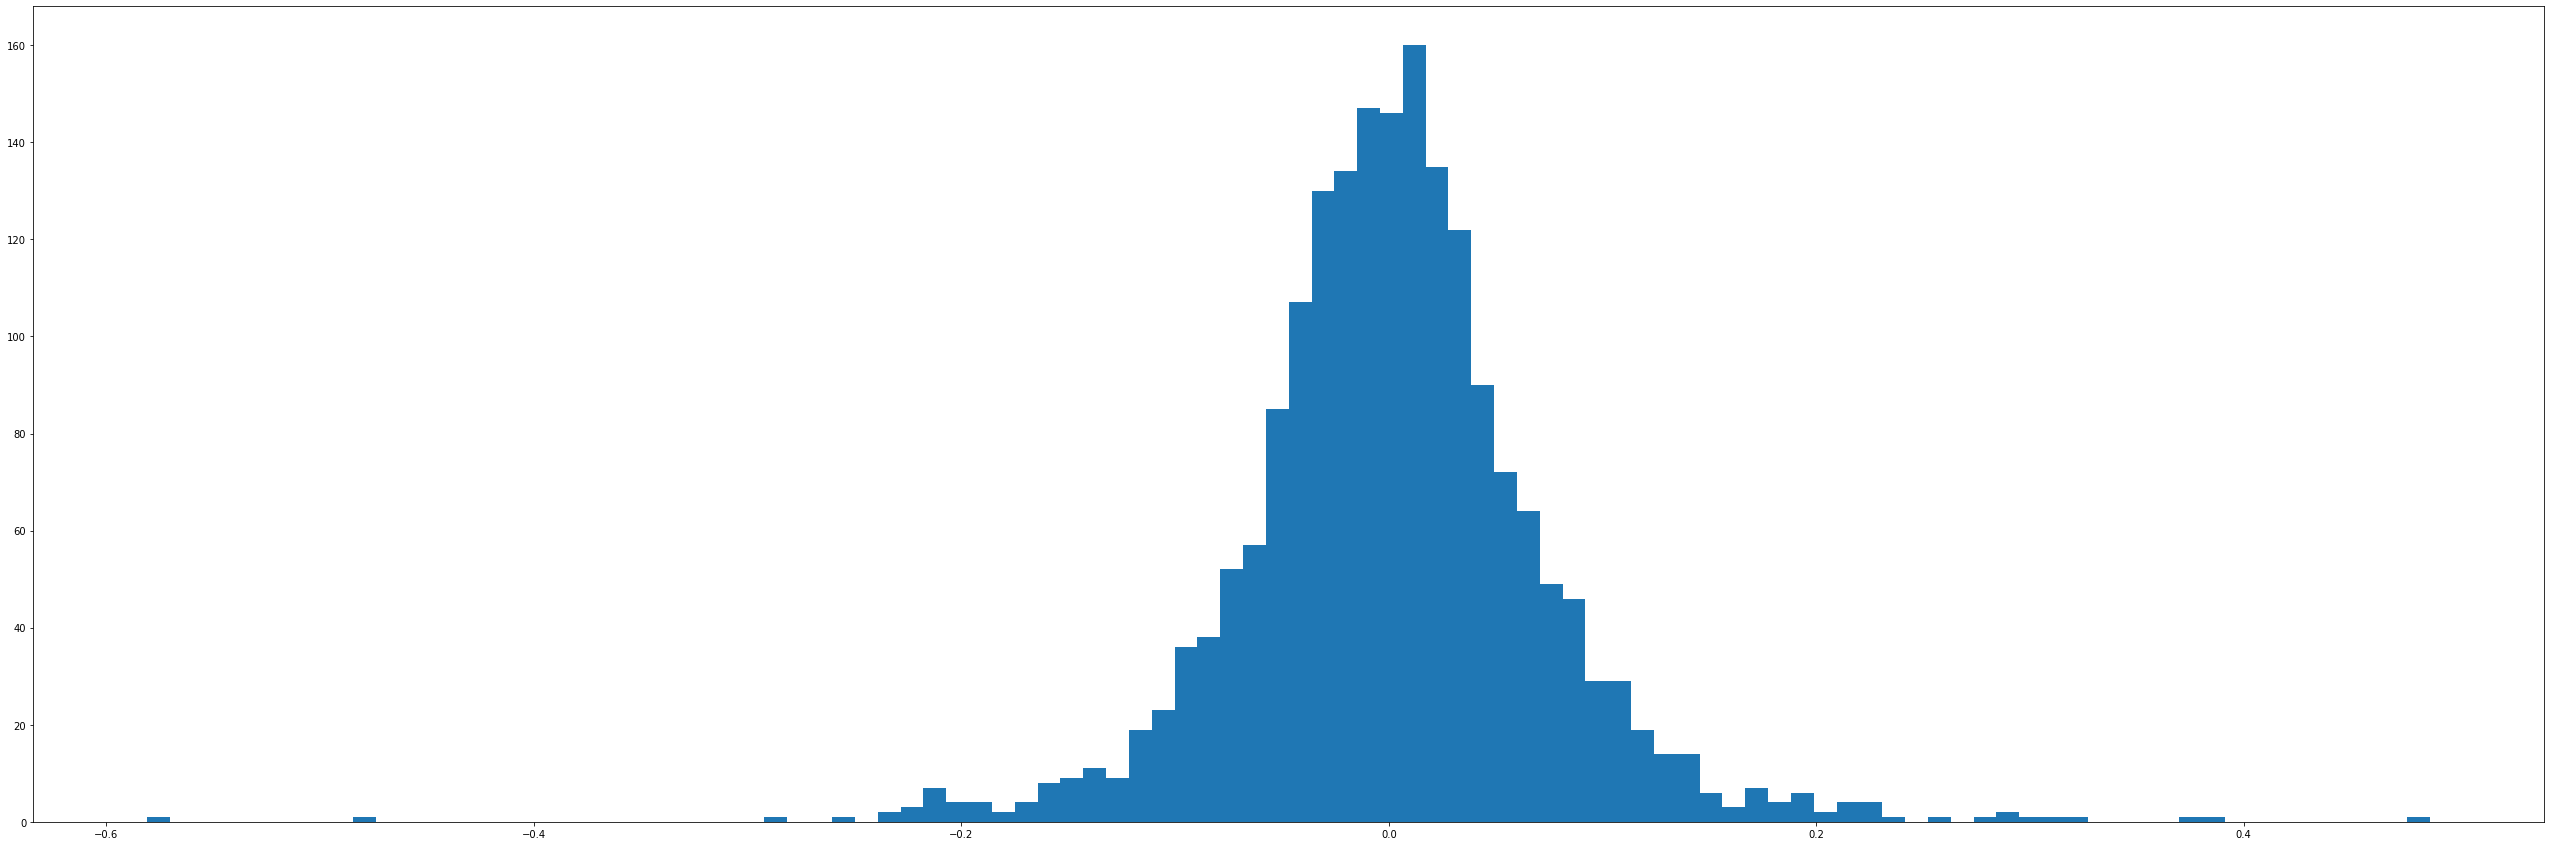

In [59]:
plt.figure(figsize=(45,15))

plt.hist(log_diff,bins=100)

plt.show()

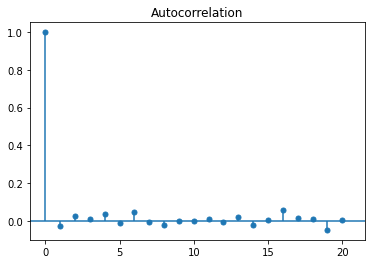

In [60]:
plot_acf(log_diff, alpha=1, lags=20).savefig("acf.jpg")

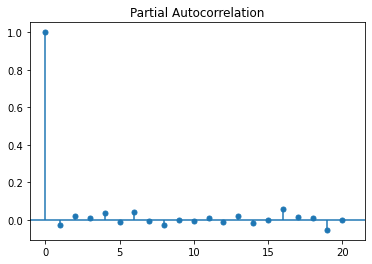

In [61]:
plot_pacf(log_diff, alpha=1, lags=20).savefig("pacf.jpg")